<a href="https://colab.research.google.com/github/trisskmasarahh/Machine-Learning_Ganjil_2025/blob/main/Modul_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys

from google.colab import drive
drive.mount('/content/drive')

LENA_PATH = '/content/drive/MyDrive/PCVK/Lena.jpg'
LENA_LC_PATH = '/content/drive/MyDrive/PCVK/Lena.jpg'

def read_image(path, flags=cv.IMREAD_COLOR):
    """Fungsi pembantu untuk membaca citra dan menangani error jika file tidak ditemukan."""
    img = cv.imread(path, flags)
    if img is None:
        print(f"\n[ERROR] Tidak dapat membaca citra dari: {path}")
        print("Pastikan file gambar tersedia.")
        sys.exit(1)
    return img

def calculate_manual_histogram(image_channel):
    """Menghitung histogram secara manual dengan iterasi."""
    if image_channel.dtype != np.uint8:
        image_channel = np.uint8(image_channel)

    hist = np.zeros(256, dtype=int)
    h, w = image_channel.shape

    for i in range(h):
        for j in range(w):
            intensity = image_channel[i, j]
            hist[intensity] += 1
    return hist

def manual_histogram_equalization(gray_image):
    """Melakukan HE secara manual berdasarkan flowchart."""
    hist = cv.calcHist([gray_image], [0], None, [256], [0, 256]).flatten()
    M, N = gray_image.shape
    total_pixels = M * N
    pr_rk = hist / total_pixels

    L_minus_1 = 255
    cdf = pr_rk.cumsum()

    s_k = np.round(cdf * L_minus_1).astype(np.uint8)

    equalized_image = s_k[gray_image]
    return equalized_image

def color_quantization_8_colors(image):
    """Memetakan 16 juta warna RGB ke 8 warna dasar (0 atau 255 per channel)."""
    img = image.copy()
    img[img <= 127] = 0
    img[img > 127] = 255
    return img

def floyd_steinberg_dithering(image):
    """Menerapkan Dithering Floyd-Steinberg pada Grayscale (1-channel)."""
    img = image.copy().astype(float)
    h, w = img.shape
    quant_levels = np.array([0, 255])

    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x]

            new_pixel = quant_levels[np.argmin(np.abs(quant_levels - old_pixel))]
            img[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x + 1 < w: img[y, x + 1] += error * (7 / 16)
            if x - 1 >= 0 and y + 1 < h: img[y + 1, x - 1] += error * (3 / 16)
            if y + 1 < h: img[y + 1, x] += error * (5 / 16)
            if x + 1 < w and y + 1 < h: img[y + 1, x + 1] += error * (1 / 16)

    return np.clip(img, 0, 255).astype(np.uint8)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Tugas 3 & 4: PERBANDINGAN HISTOGRAM (MANUAL VS NUMPY)


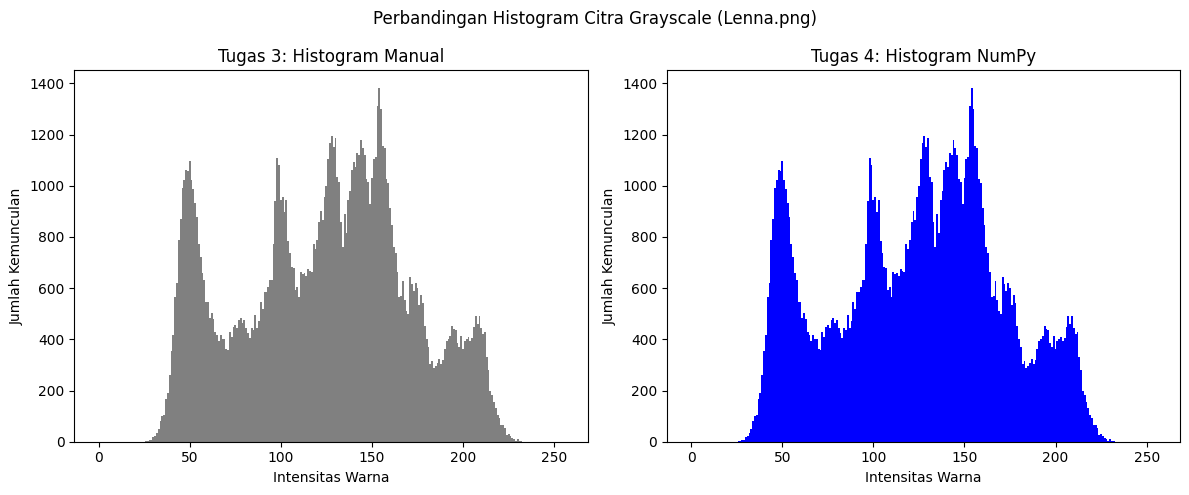


Perbandingan Hasil (Tugas 4): Apakah output muncul sama? Ya. Hasil perhitungan harusnya identik/sangat mirip.


In [5]:
print("\n" + "="*50)
print("Tugas 3 & 4: PERBANDINGAN HISTOGRAM (MANUAL VS NUMPY)")
print("="*50)

# Membaca citra dan konversi ke Grayscale
img_lena = read_image(LENA_PATH, cv.IMREAD_COLOR)
gray_lena = cv.cvtColor(img_lena, cv.COLOR_BGR2GRAY)

# Tugas 3: Histogram Manual
hist_manual = calculate_manual_histogram(gray_lena)

# Tugas 4: Histogram NumPy
hist_numpy, bins = np.histogram(gray_lena.flatten(), 256, [0, 256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(np.arange(256), hist_manual, color='gray', width=1)
plt.title('Tugas 3: Histogram Manual')
plt.xlabel("Intensitas Warna"); plt.ylabel("Jumlah Kemunculan")

plt.subplot(1, 2, 2)
plt.bar(np.arange(256), hist_numpy, color='blue', width=1)
plt.title('Tugas 4: Histogram NumPy')
plt.xlabel("Intensitas Warna"); plt.ylabel("Jumlah Kemunculan")

plt.suptitle('Perbandingan Histogram Citra Grayscale (Lenna.png)')
plt.tight_layout()
plt.show()

# Perbandingan Hasil
similarity = np.allclose(hist_manual, hist_numpy)
print(f"\nPerbandingan Hasil (Tugas 4): Apakah output muncul sama? {'Ya' if similarity else 'Tidak'}. Hasil perhitungan harusnya identik/sangat mirip.")


Tugas 5 & 6: PERBANDINGAN HISTOGRAM EQUALIZATION (MANUAL VS CV2)


/tmp/ipython-input-4029380870.py:23: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2, 3, 4); plt.hist(gray_lc.flatten(), 256, [0, 256], color='gray'); plt.title('Hist. Asli');
/tmp/ipython-input-4029380870.py:24: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2, 3, 5); plt.hist(equalized_manual.flatten(), 256, [0, 256], color='red'); plt.title('Hist. HE Manual');
/tmp/ipython-input-4029380870.py:25: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2, 3, 6); plt.hist(equalized_cv2.flatten(), 256, [0, 256], color='blue'); plt.title('Hist. HE CV2');


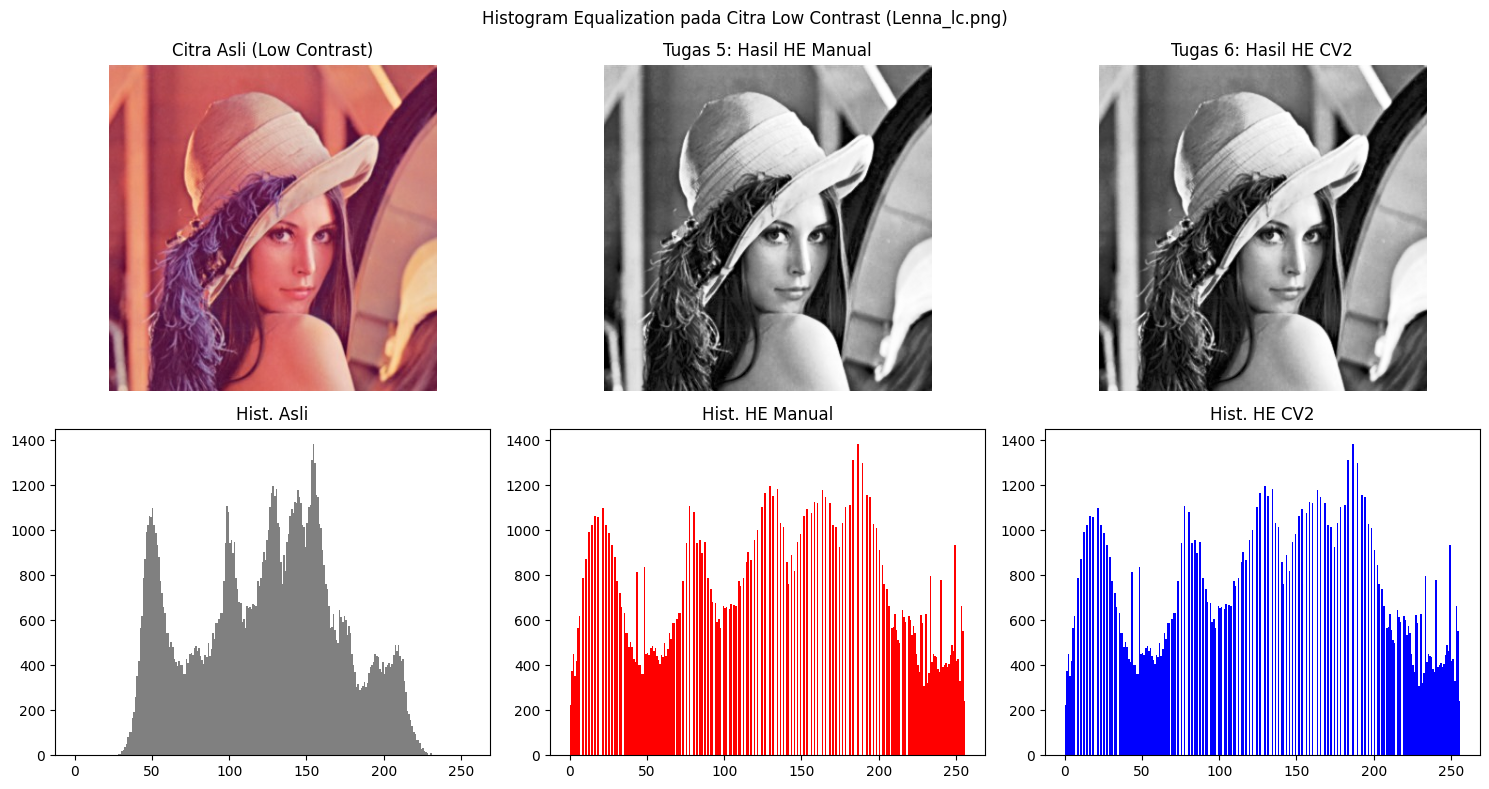


Perbandingan Hasil (Tugas 6): Apakah output muncul sama? Ya. Persentase kesamaan: 100.00%


In [6]:
print("\n" + "="*50)
print("Tugas 5 & 6: PERBANDINGAN HISTOGRAM EQUALIZATION (MANUAL VS CV2)")
print("="*50)

# Membaca citra low contrast dan konversi ke Grayscale
img_lc = read_image(LENA_LC_PATH, cv.IMREAD_COLOR)
gray_lc = cv.cvtColor(img_lc, cv.COLOR_BGR2GRAY)

# Tugas 5: Manual HE
equalized_manual = manual_histogram_equalization(gray_lc)

# Tugas 6: OpenCV HE
equalized_cv2 = cv.equalizeHist(gray_lc)

# Tampilkan Citra
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1); plt.imshow(cv.cvtColor(img_lc, cv.COLOR_BGR2RGB)); plt.title('Citra Asli (Low Contrast)'); plt.axis('off')
plt.subplot(2, 3, 2); plt.imshow(equalized_manual, cmap='gray'); plt.title('Tugas 5: Hasil HE Manual'); plt.axis('off')
plt.subplot(2, 3, 3); plt.imshow(equalized_cv2, cmap='gray'); plt.title('Tugas 6: Hasil HE CV2'); plt.axis('off')

# Tampilkan Histogram
plt.subplot(2, 3, 4); plt.hist(gray_lc.flatten(), 256, [0, 256], color='gray'); plt.title('Hist. Asli');
plt.subplot(2, 3, 5); plt.hist(equalized_manual.flatten(), 256, [0, 256], color='red'); plt.title('Hist. HE Manual');
plt.subplot(2, 3, 6); plt.hist(equalized_cv2.flatten(), 256, [0, 256], color='blue'); plt.title('Hist. HE CV2');

plt.suptitle("Histogram Equalization pada Citra Low Contrast (Lenna_lc.png)")
plt.tight_layout()
plt.show()

# Perbandingan Hasil
similarity_he = np.mean(equalized_manual == equalized_cv2) * 100
print(f"\nPerbandingan Hasil (Tugas 6): Apakah output muncul sama? {'Ya' if similarity_he > 99 else 'Tidak (Ada sedikit perbedaan)'}. Persentase kesamaan: {similarity_he:.2f}%")


Tugas 7: PEMETAAN 16 JUTA WARNA KE 8 WARNA


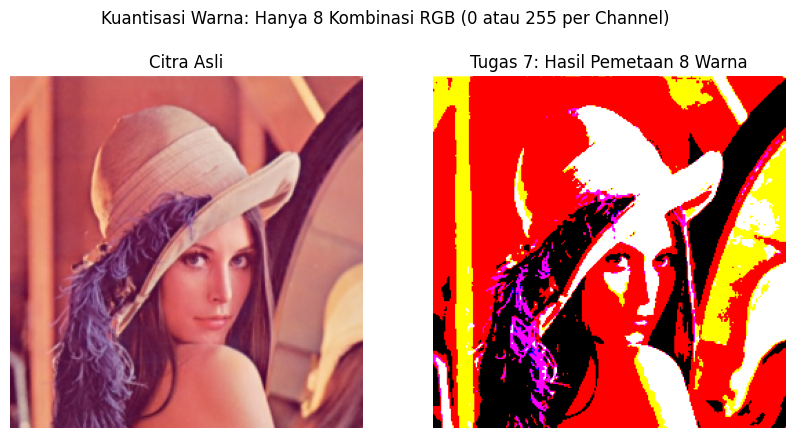

In [7]:
print("\n" + "="*50)
print("Tugas 7: PEMETAAN 16 JUTA WARNA KE 8 WARNA")
print("="*50)

# Membaca citra berwarna (Color)
img_lena_color = read_image(LENA_PATH, cv.IMREAD_COLOR)
img_lena_color = cv.resize(img_lena_color, (256, 256)) # Resize untuk tampilan

# Lakukan kuantisasi
img_quantized = color_quantization_8_colors(img_lena_color)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1); plt.imshow(cv.cvtColor(img_lena_color, cv.COLOR_BGR2RGB)); plt.title('Citra Asli'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cv.cvtColor(img_quantized, cv.COLOR_BGR2RGB)); plt.title('Tugas 7: Hasil Pemetaan 8 Warna'); plt.axis('off')

plt.suptitle("Kuantisasi Warna: Hanya 8 Kombinasi RGB (0 atau 255 per Channel)")
plt.show()


Tugas 8: DITHERING FLOYD-STEINBERG (COLOR)


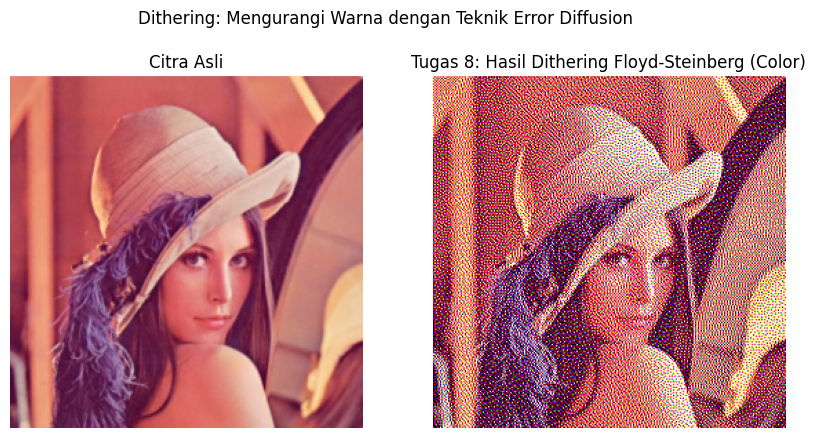

In [8]:
print("\n" + "="*50)
print("Tugas 8: DITHERING FLOYD-STEINBERG (COLOR)")
print("="*50)

# Gunakan img_lena_color dari Tugas 7 (sudah di-resize)
# Pisahkan channel B, G, R
b, g, r = cv.split(img_lena_color)

# Terapkan dithering pada setiap channel secara independen
dith_b = floyd_steinberg_dithering(b)
dith_g = floyd_steinberg_dithering(g)
dith_r = floyd_steinberg_dithering(r)

# Gabungkan kembali
img_dithered_color = cv.merge((dith_b, dith_g, dith_r))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1); plt.imshow(cv.cvtColor(img_lena_color, cv.COLOR_BGR2RGB)); plt.title('Citra Asli'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cv.cvtColor(img_dithered_color, cv.COLOR_BGR2RGB)); plt.title('Tugas 8: Hasil Dithering Floyd-Steinberg (Color)'); plt.axis('off')

plt.suptitle("Dithering: Mengurangi Warna dengan Teknik Error Diffusion")
plt.show()


Tugas 9: ALUR PROSES: Grayscale -> HE -> Dithering


/tmp/ipython-input-1567688570.py:23: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2, 3, 4); plt.hist(gray_lc_task9.flatten(), 256, [0, 256], color='gray'); plt.title('Hist. Asli');
/tmp/ipython-input-1567688570.py:24: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2, 3, 5); plt.hist(equalized_task9.flatten(), 256, [0, 256], color='red'); plt.title('Hist. Setelah HE');
/tmp/ipython-input-1567688570.py:25: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2, 3, 6); plt.hist(img_final_dithered.flatten(), 256, [0, 256], color='blue'); plt.title('Hist. Setelah Dithering');


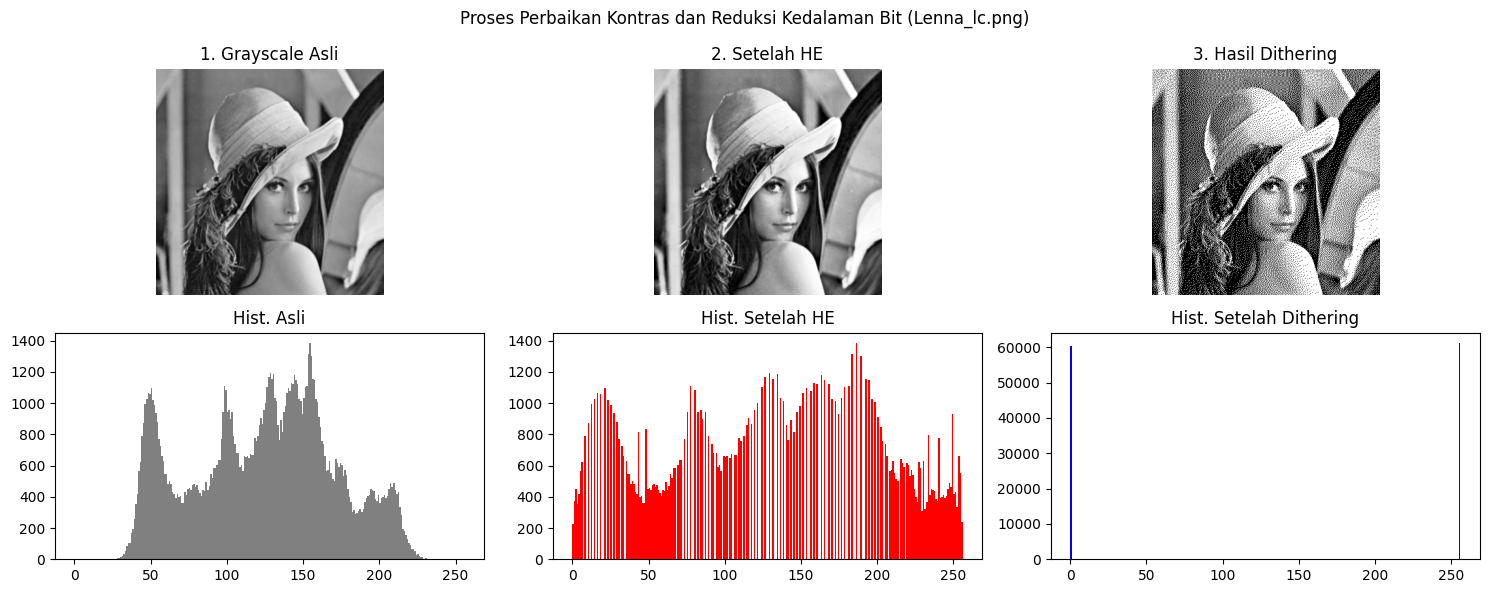

In [9]:
print("\n" + "="*50)
print("Tugas 9: ALUR PROSES: Grayscale -> HE -> Dithering")
print("="*50)

# 1. Rubah menjadi grey image (menggunakan gray_lc dari Tugas 5)
gray_lc_task9 = gray_lc.copy()

# 2. Terapkan Histogram Equalization
equalized_task9 = cv.equalizeHist(gray_lc_task9)

# 3. Implementasikan proses dithering Floyd and Steinberg
img_final_dithered = floyd_steinberg_dithering(equalized_task9)

# Menampilkan Citra dan Histogram
plt.figure(figsize=(15, 6))

# Citra
plt.subplot(2, 3, 1); plt.imshow(gray_lc_task9, cmap='gray'); plt.title('1. Grayscale Asli'); plt.axis('off')
plt.subplot(2, 3, 2); plt.imshow(equalized_task9, cmap='gray'); plt.title('2. Setelah HE'); plt.axis('off')
plt.subplot(2, 3, 3); plt.imshow(img_final_dithered, cmap='gray'); plt.title('3. Hasil Dithering'); plt.axis('off')

# Histogram
plt.subplot(2, 3, 4); plt.hist(gray_lc_task9.flatten(), 256, [0, 256], color='gray'); plt.title('Hist. Asli');
plt.subplot(2, 3, 5); plt.hist(equalized_task9.flatten(), 256, [0, 256], color='red'); plt.title('Hist. Setelah HE');
plt.subplot(2, 3, 6); plt.hist(img_final_dithered.flatten(), 256, [0, 256], color='blue'); plt.title('Hist. Setelah Dithering');

plt.suptitle("Proses Perbaikan Kontras dan Reduksi Kedalaman Bit (Lenna_lc.png)")
plt.tight_layout()
plt.show()